In [2]:
import pandas as pd 

import matplotlib.pyplot as plt 

import seaborn as sns 

In [3]:
df = pd.read_csv('times.csv',index_col=0)
df.head()

,lang,talla_dict,talla_consultas,SpellSuggester_type,alg,iter,elapsed
0,Spanish,20,10,Iterative,levenshtein,0,0.068001
1,Spanish,20,10,Iterative,levenshtein,1,0.098999
2,Spanish,20,10,Iterative,levenshtein,2,0.069015
3,Spanish,20,10,Iterative,restricted,0,0.087027
4,Spanish,20,10,Iterative,restricted,1,0.073009


In [4]:
df['alg'] = df['SpellSuggester_type'] + '__' + df['alg']
df.drop('SpellSuggester_type',axis=1,inplace=True)

df.head()

,lang,talla_dict,talla_consultas,alg,iter,elapsed
0,Spanish,20,10,Iterative__levenshtein,0,0.068001
1,Spanish,20,10,Iterative__levenshtein,1,0.098999
2,Spanish,20,10,Iterative__levenshtein,2,0.069015
3,Spanish,20,10,Iterative__restricted,0,0.087027
4,Spanish,20,10,Iterative__restricted,1,0.073009


In [5]:
tmp = df.groupby(['lang','talla_dict','talla_consultas','alg'])['elapsed'].agg(['mean','std'])
tmp.head()

mean       std
lang    talla_dict talla_consultas alg                                        
English 20         10              Iterative__intermediate  0.028734  0.000572
                                   Iterative__levenshtein   0.048301  0.009352
                                   Iterative__restricted    0.054618  0.002372
                                   Trie__intermediate       0.058728  0.000972
                                   Trie__levenshtein        0.029310  0.000728

Las desviaciones estandar son insignificantes por lo que podemos considerar que los tiempos calculados en las diversas ejecuciones son validos y a partir de ahora trabajaremos con la media de las multiple iteraciones

In [7]:
tmp = df.groupby(['talla_dict','talla_consultas','alg'])['lang','elapsed'].agg(['mean','std'])
tmp.head()

elapsed          
                                                        mean       std
talla_dict talla_consultas alg                                        
20         10              Iterative__intermediate  0.032701  0.006983
                           Iterative__levenshtein   0.063486  0.020875
                           Iterative__restricted    0.067819  0.015240
                           Trie__intermediate       0.078370  0.024157
                           Trie__levenshtein        0.036159  0.010000

Los tiempos de ejecucion entre los dos diccionarios ingles y español son muy parecidos, por lo que consideramos que los diversos algoritmos trabajan igual en ambos, tal y como era de esperar,por lo que a partir de ahora trabajaremos con la media entre estos dos

In [8]:
df = df.groupby(['talla_dict','talla_consultas','alg'])['elapsed'].mean().reset_index()
df.head()

,talla_dict,talla_consultas,alg,elapsed
0,20,10,Iterative__intermediate,0.032701
1,20,10,Iterative__levenshtein,0.063486
2,20,10,Iterative__restricted,0.067819
3,20,10,Trie__intermediate,0.078370
4,20,10,Trie__levenshtein,0.036159


In [43]:
df.talla_consultas  = df.talla_consultas.astype('category')
df.talla_dict  = df.talla_consultas.astype('category')

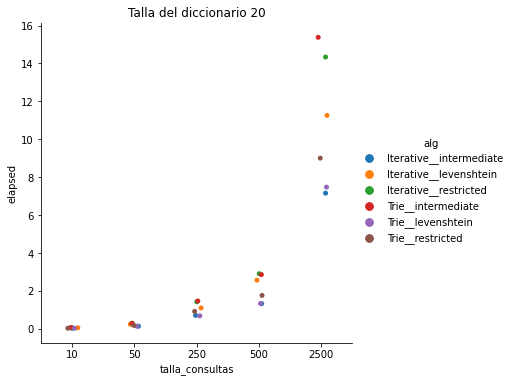

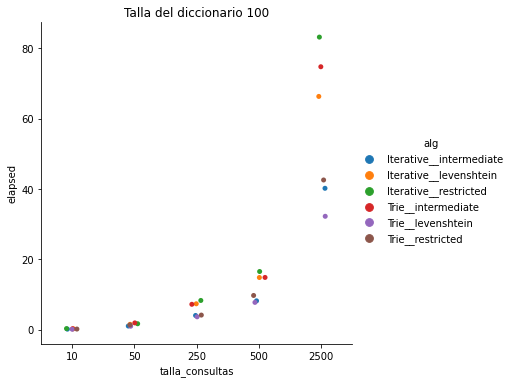

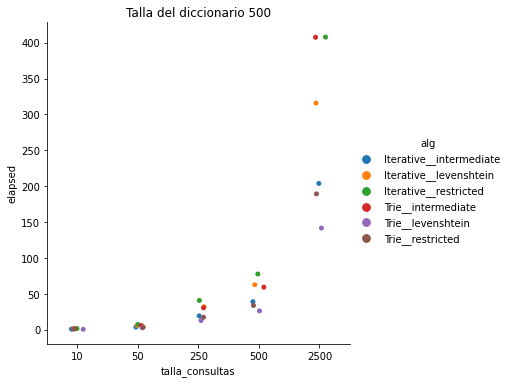

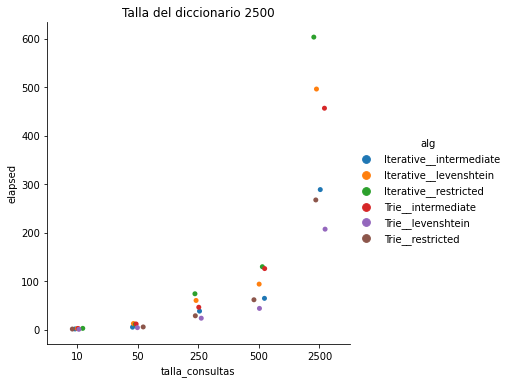

In [54]:
tds = df.talla_dict.unique()
for td in tds:
    tmp = df[df['talla_dict']==td].drop('talla_dict',axis=1)
    g = sns.catplot(
        data=tmp,
        x="talla_consultas", y="elapsed", hue='alg',
    )
    plt.title("Talla del diccionario "+str(td))